In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# 取第一筆
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


這是: 5


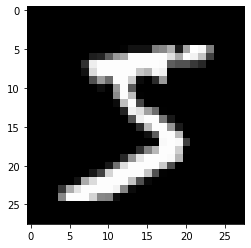

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("這是:", y_train[0])
plt.imshow(x_train[0], cmap = "gray")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 64 * 784 + 64(bias) = 50240
model.add(Dense(256, activation="relu", input_dim = 784))
# 64 * 10 +10(bias) = 650
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss = CategoricalCrossentropy(), 
              optimizer = "adam", 
              metrics = ["accuracy"])

In [7]:
# 資料預處理
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本", y_train[0])
print("處理過", y_train_cat[0])

原本 5
處理過 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# -1: 自動計算
# 圖片: 先1D化 -> 除255(normalize)
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [9]:
# batch_size:看多少筆資料做一次梯度下降(圖片不大: 100-200, 圖片大: 10-20)
# validation_split: 切出一部分作為驗證資料
# epochs: 整份資料集看多少遍，不要過多次數，以免過擬和。val_loss大概平滑，就可停下。
# 一個epoch做了54000/200 = 270次梯度下降
# verbose(可選用): 0=安靜模式，1=進度條，2=每輪一回
model.fit(x_train_norm, y_train_cat, batch_size = 200, validation_split = 0.1, epochs = 12, verbose = 2)

Epoch 1/12
270/270 - 1s - loss: 0.3669 - accuracy: 0.8990 - val_loss: 0.1562 - val_accuracy: 0.9600
Epoch 2/12
270/270 - 1s - loss: 0.1602 - accuracy: 0.9539 - val_loss: 0.1208 - val_accuracy: 0.9660
Epoch 3/12
270/270 - 1s - loss: 0.1143 - accuracy: 0.9673 - val_loss: 0.0965 - val_accuracy: 0.9727
Epoch 4/12
270/270 - 1s - loss: 0.0847 - accuracy: 0.9764 - val_loss: 0.0856 - val_accuracy: 0.9752
Epoch 5/12
270/270 - 1s - loss: 0.0670 - accuracy: 0.9810 - val_loss: 0.0753 - val_accuracy: 0.9772
Epoch 6/12
270/270 - 1s - loss: 0.0546 - accuracy: 0.9838 - val_loss: 0.0753 - val_accuracy: 0.9783
Epoch 7/12
270/270 - 1s - loss: 0.0441 - accuracy: 0.9880 - val_loss: 0.0735 - val_accuracy: 0.9778
Epoch 8/12
270/270 - 1s - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.0743 - val_accuracy: 0.9780
Epoch 9/12
270/270 - 1s - loss: 0.0299 - accuracy: 0.9923 - val_loss: 0.0700 - val_accuracy: 0.9805
Epoch 10/12
270/270 - 1s - loss: 0.0246 - accuracy: 0.9945 - val_loss: 0.0662 - val_accuracy: 0.9803

In [10]:
# 只要還在tensorflow裡，需要帶入one-hot encoding
model.evaluate(x_test_norm, y_test_cat, verbose = 2)

313/313 - 0s - loss: 0.0657 - accuracy: 0.9808


[0.06569427996873856, 0.9807999730110168]

In [11]:
# predict: 給機率，predict_classes: 給類別
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [12]:
# 不是在tf裡，帶入原本的y
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
c = [ "{}(預測)".format(i) for i in range(10)]
i = [ "{}(真實)".format(i) for i in range(10)]
pd.DataFrame(mat, columns = c, index = i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),972,0,0,2,0,0,2,1,3,0
1(真實),0,1125,3,0,0,1,2,2,2,0
2(真實),4,2,1008,2,1,0,3,6,6,0
3(真實),0,0,1,991,0,1,0,5,5,7
4(真實),1,0,0,1,967,0,6,2,0,5
5(真實),2,0,0,13,1,859,8,1,4,4
6(真實),3,2,0,1,1,2,949,0,0,0
7(真實),0,3,5,1,0,0,0,1012,3,4
8(真實),6,1,3,2,3,3,1,3,949,3
9(真實),3,4,0,6,11,0,0,6,3,976


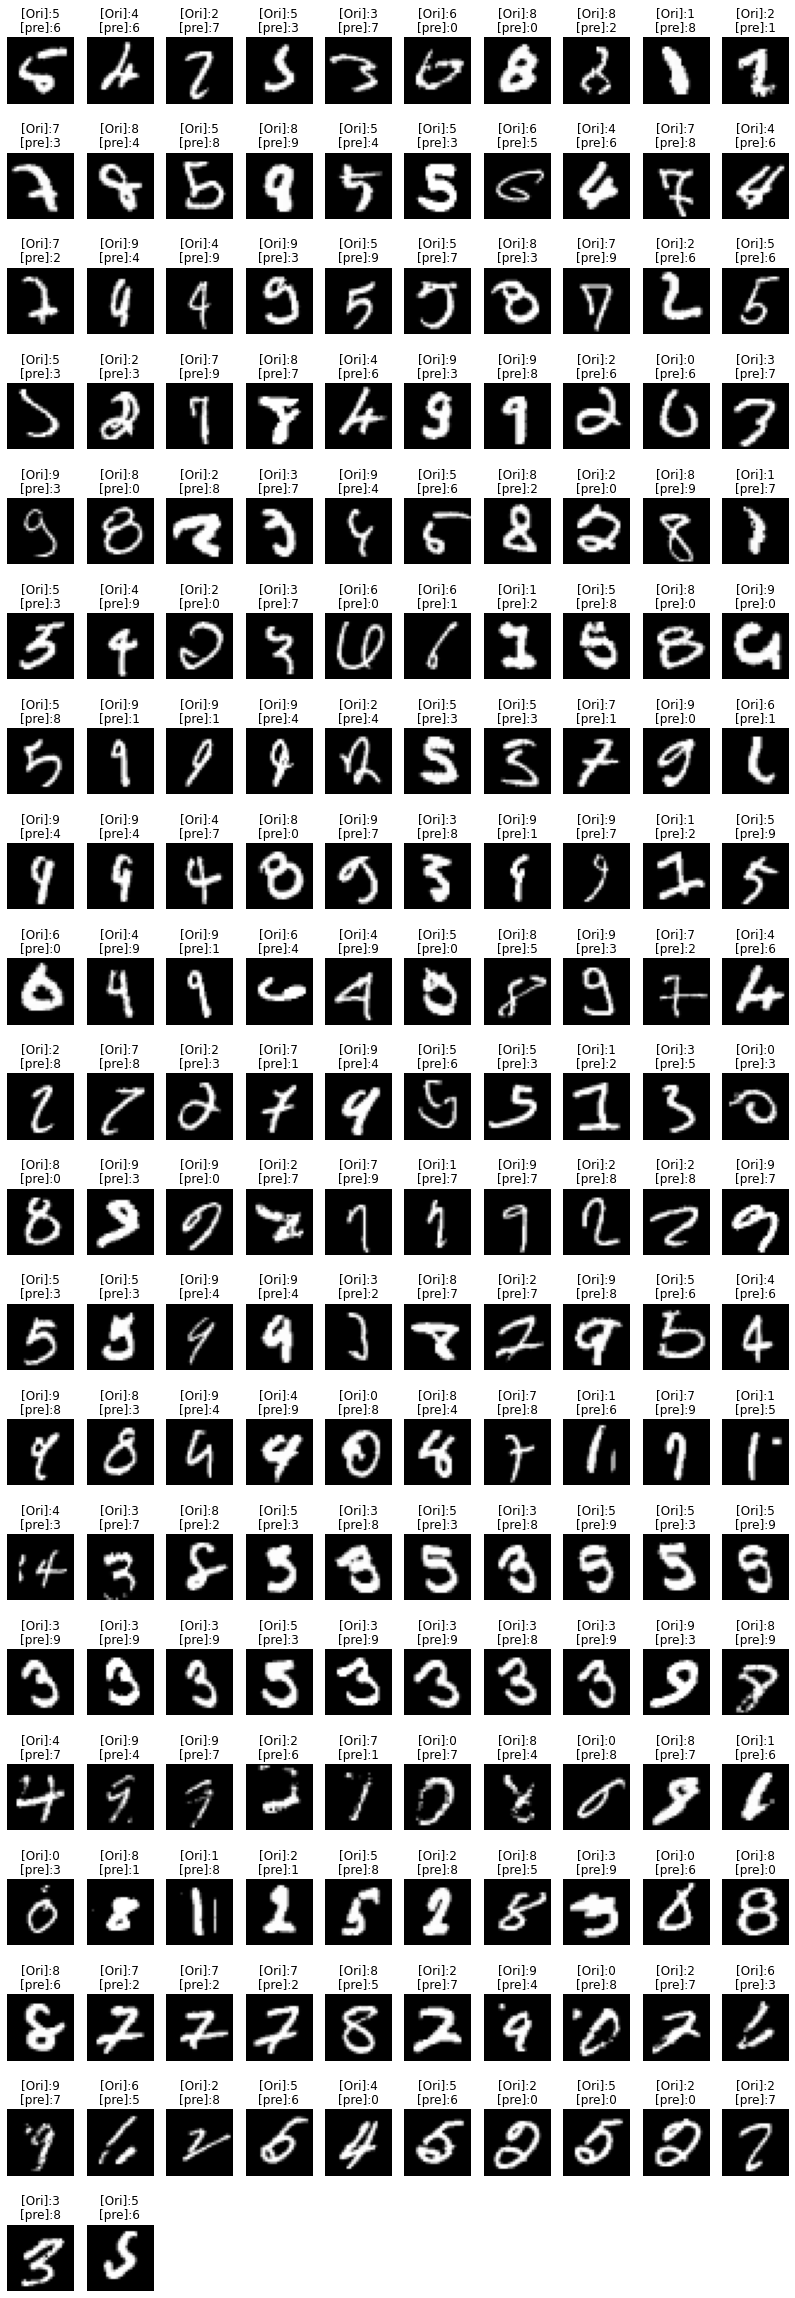

In [18]:
import numpy as np
# nonzero: 取出不一樣的index
# (x座標, y座標, z座標...)
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test[idx]
false_predict = pre[idx]

plt.figure(figsize = (14,42))
width = 10
height = len(false_img) // width +1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[pre]:{}".format(false_answer[i], false_predict[i])
    plt.title(t)
    plt.imshow(img, cmap = "gray")

輸入檔名:3.png
應該是: 3


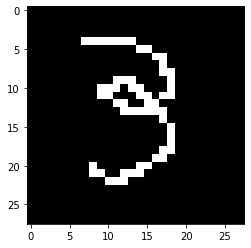

In [27]:
# 讀圖
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size = (28, 28)).convert("L")
# 剛剛帶入(10000, 784)
# 現在帶入(1, 784)
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)[0]
print("答案應該是:", ans)
plt.imshow(img, cmap = "gray")